<a href="https://colab.research.google.com/github/facundomarino1/hello-world/blob/main/etherscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bscscan.com/

https://bscscan.com/address/0x0eD7e52944161450477ee417DE9Cd3a859b14fD0

In [ ]:
import requests
import pandas as pd

api_key_eth = "XXXXXXXXX"
api_key_bsc = "BFMVI3JE3QWFKBFJTR1NHSXREP773GQK41"
api_key_heco = "XXXXXXXXXXXX"

def getTx(address, network, api_key, startblock=0):
    
    if network == "ETH":
        url  = "https://api.etherscan.io/api"
    elif network == "BSC":
        url = "https://api.bscscan.com/api"
    elif network == "HECO":
        url = "https://api.hecoinfo.com/api"
        
    params = {"module":"account", "action":"txlist" , "address":address, "startblock":startblock, 
          "endblock":999999999999, "page":1, "offset":10000, "sort":"asc", "apikey":api_key}
        
    r = requests.get(url, params)


    res = r.json().get('result', r.json()['message'])
    try:
      df = pd.DataFrame(res)
      df['date'] = pd.to_datetime(df['timeStamp'], unit='s')
    except:
      df = pd.DataFrame()

    return df

address = '0x05faf555522Fa3F93959F86B41A3808666093210' # Contrato BUSD-UST de pancakeSwap
data = getTx(address, network='BSC', api_key=api_key_bsc)
data

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,date
0,6833241,1619235151,0x906136eb241810754baf641185737f2fa7be99c8e1d8...,31,0x15d03b6fd9b70f6641d537d8cfb958dde79a200847dc...,207,0x4be9d267a1c351878b377dadeb755bdcda4166f0,0x05faf555522fa3f93959f86b41a3808666093210,0,48886,5000000000,0,1,0x095ea7b300000000000000000000000010ed43c71871...,,21849408,44442,5171370,2021-04-24 03:32:31
1,6834523,1619238997,0x45b11167e5904baa06951810c3e38e35c2f8a14aed37...,1251,0x7a31d0dab31807ef343267ec323ae7abfb0ac759cd9b...,60,0x9b58964c8efc5b5102a75d65cc4df81b471e646c,0x05faf555522fa3f93959f86b41a3808666093210,0,66663,5000000000,0,1,0x095ea7b300000000000000000000000073feaa1ee314...,,5931821,44442,5170088,2021-04-24 04:36:37
2,6835560,1619242108,0x047618c1b7c454fe3ff63c2354dc061a57a786b67b24...,538,0xdeb1156eda6e1a77701524d9adba7cfab5b0ec97f398...,107,0x9a62bd2e9b437980b217ad07a0762cbe6f8593b8,0x05faf555522fa3f93959f86b41a3808666093210,0,66663,5000000000,0,1,0x095ea7b300000000000000000000000073feaa1ee314...,,9578695,44442,5169051,2021-04-24 05:28:28
3,6835926,1619243206,0xb91c2973aa5465884322f52a31818d32f4f08e165810...,11867,0xfc64f1a88da2bf87098dfa8dcf2be764d7dfadb3ff7f...,106,0x00a2c3d755c21bc837a3ca9a32279275eae9e3d6,0x05faf555522fa3f93959f86b41a3808666093210,0,66663,5000000000,0,1,0x095ea7b300000000000000000000000073feaa1ee314...,,14112608,44442,5168685,2021-04-24 05:46:46
4,6836110,1619243758,0xabe9a867632526825af7162d9c28f18c372d1fc9e776...,749,0xab46fe5e91a40023d2f929cad09291ccc88c4b726dfc...,79,0x99362a500beade9479c2af8660996b237b6ae6d2,0x05faf555522fa3f93959f86b41a3808666093210,0,48886,5000000000,0,1,0x095ea7b300000000000000000000000010ed43c71871...,,9101306,44442,5168501,2021-04-24 05:55:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,12000437,1634928898,0xa78ac26593bde69adb4f3ac825310eb26ad9d9c1bea6...,118,0xd1952e5a30904c2c6b80971f54d0a14e8d925522d7fd...,22,0x0f049716c01e42f45bfc9d2c558504e7b61f5bee,0x05faf555522fa3f93959f86b41a3808666093210,0,66357,5000000000,0,1,0x095ea7b30000000000000000000000007a707318c52f...,,3426622,44238,4174,2021-10-22 18:54:58
9726,12000681,1634929630,0x6bc782eda7414c0e104b3ec93e15d1d460a7af0dbaeb...,111,0x2a5891cb33a4a8a6d3d6f12569b4095a87bf3ca34c7d...,182,0xe1220bfc4930d090ae47b2c57a3fa0d41ae92e18,0x05faf555522fa3f93959f86b41a3808666093210,0,44442,5000000000,0,1,0x095ea7b300000000000000000000000073feaa1ee314...,,20238572,44442,3930,2021-10-22 19:07:10
9727,12001027,1634930679,0xe76304a14de8b8639f4ef2298db235a2d32ef79b0f47...,360,0x931c07163e735868a6a83f25faa42b9cdabfff354b3a...,150,0x7f8bdb9c2d7f2f256a7033241ef510eb029db0c5,0x05faf555522fa3f93959f86b41a3808666093210,0,66249,5000000000,0,1,0x095ea7b300000000000000000000000076c8b991f99a...,,18455836,44166,3584,2021-10-22 19:24:39
9728,12001571,1634932336,0x83a60053cf93a44759ef7caebe4226d20f3c1d5573c0...,463,0x0c723d94be67624034a2ff7987cc57d830698d50d045...,31,0x4a9c8a12184927b2496256ae285ded3daddb5c8f,0x05faf555522fa3f93959f86b41a3808666093210,0,66249,5000000000,0,1,0x095ea7b300000000000000000000000076c8b991f99a...,,4779284,44166,3040,2021-10-22 19:52:16


In [ ]:
%%time

data = getTx(address, network='BSC', api_key=api_key_bsc)

i = 1
while True:
  print(f'Procesando Página: {i}    ', end='\r')
  i += 1
  try:
    last_block = int(data.iloc[-1].blockNumber)
    data_nueva = getTx(address, network='BSC', api_key=api_key_bsc, startblock=last_block)
    if len(data_nueva) > 1:
      data = pd.concat([data, data_nueva])
    else:
      break
  except:
    pass
data

CPU times: user 265 ms, sys: 16.1 ms, total: 282 ms
Wall time: 2.85 s


In [ ]:
data

,blockNumber,timeStamp,hash,nonce,...,cumulativeGasUsed,gasUsed,confirmations,date
0,6833241,1619235151,0x906136eb241810754baf641185737f2fa7be99c8e1d8...,31,...,21849408,44442,5088310,2021-04-24 03:32:31
1,6834523,1619238997,0x45b11167e5904baa06951810c3e38e35c2f8a14aed37...,1251,...,5931821,44442,5087028,2021-04-24 04:36:37
2,6835560,1619242108,0x047618c1b7c454fe3ff63c2354dc061a57a786b67b24...,538,...,9578695,44442,5085991,2021-04-24 05:28:28
3,6835926,1619243206,0xb91c2973aa5465884322f52a31818d32f4f08e165810...,11867,...,14112608,44442,5085625,2021-04-24 05:46:46
4,6836110,1619243758,0xabe9a867632526825af7162d9c28f18c372d1fc9e776...,749,...,9101306,44442,5085441,2021-04-24 05:55:58
...,...,...,...,...,...,...,...,...,...
9661,11915997,1634670255,0xa203675ff1e8ec59c58ae493695796ab167d5c46357b...,135,...,21240470,25242,5554,2021-10-19 19:04:15
9662,11916001,1634670269,0xeea96515ff4cd9e733a57caa27339fab1f33fc4fa163...,136,...,50334760,25242,5550,2021-10-19 19:04:29
9663,11917603,1634676138,0x5a508fbd7109b72fb26d93ebdaee1f86fe51e81f5e44...,235,...,24595597,44442,3948,2021-10-19 20:42:18
9664,11918239,1634678057,0xe5fc8f1219c36300f96a7a8ffff5773730e0fb195368...,1501,...,35613911,44442,3312,2021-10-19 21:14:17


In [ ]:
data.columns

Index(['blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash',
       'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'isError',
       'txreceipt_status', 'input', 'contractAddress', 'cumulativeGasUsed',
       'gasUsed', 'confirmations', 'date'],
      dtype='object')

In [ ]:
data['gasPrice'].describe()

count           9666
unique            53
top       5000000000
freq            8914
Name: gasPrice, dtype: object

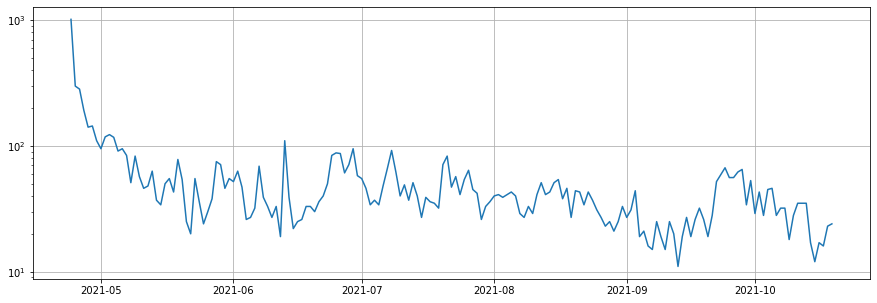

In [ ]:
s = data.set_index('date')['gasPrice'].apply(pd.to_numeric)
s.groupby(s.index.date).count().plot(figsize=(15,5), logy=True, grid=True)